In [11]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install sidetable
import sidetable as stb
from scipy import stats
import requests
from bs4 import BeautifulSoup
#!pip install selenium
from selenium import webdriver

In [1]:
pwd

'C:\\Users\\kamid'

In [12]:
model = []
company = []
km = []
price = []
fuel = []
city = []
EMIStarts = []
year= []


# Model
for i in range(1,14):
    url = (f"https://www.carwale.com/used/cars-for-sale/#sc=-1&so=-1&car=7+16+8+10&city=105&pc=105&pn=1")
    page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
    soup = BeautifulSoup(page.text)
    a = soup.find_all("span",class_="spancarname card-detail-block__title-text-with-year")
    for i in a:
        text = i.text.strip()
        regex = re.findall("\W(\w+\D\w+).+",text)
        model.append(regex[0])

    # KiloMeter
    b = soup.find_all("span",class_="slkms")
    for i in b:
        text = i.text
        regex = re.findall("(\d+\W\d+).+",text)
        km.append(regex[0])
        
    # Fuel
    c = soup.find_all("span",class_="fuel")
    for i in c:
        text = i.text.rstrip("\xa0\xa0|\xa0\xa0")
        fuel.append(text)
        #if text:
         #   fuel.append(text)
        #else:
         #   fuel.append(np.NaN)
        
    # price
    d = soup.find_all("span",class_="rupee-lac slprice")
    for i in d:
        text = i.text
        regex = re.findall("\s(\d+\W\d+)",text)
        if regex:
            price.append(regex[0])
        else:
            price.append(np.nan)
            
    # City
    e = soup.find_all("div",class_="card-detail-block")
    for i in e:
        b=i.find("span",class_="cityName")
        if b:
            city.append(b.text)
        else:
            city.append(np.nan)
        
        
    # EMIStarts 
    f = soup.find_all("div",class_="card-detail-block")
    for i in f:
        a=i.find("button",class_="card-detail__emi-link text-link")
        if a:
            EMIStarts.append(a.text)
        else:
            EMIStarts.append(np.nan)
    # Year
    g = soup.find_all("span",class_="slYear card-detail-block__title-text-with-year")
    for i in g:
        year.append(i.text.strip())
        
        
    # company 
    h = soup.find_all("span",class_="spancarname card-detail-block__title-text-with-year")
    for i in h:
        text = i.text
        regex = re.findall("\W(\w+\w).+",text)
        company.append(regex[0])

In [13]:
print(len(model),len(price),len(km),len(fuel), len(company), len(year), len(EMIStarts), len(city))

413 413 413 413 413 413 413 413


In [14]:
EMIStarts

['₹72,986',
 '₹13,202',
 '₹10,877',
 nan,
 '₹15,759',
 '₹4,317',
 nan,
 '₹49,820',
 '₹7,888',
 '₹9,465',
 '₹69,748',
 '₹5,646',
 '₹10,777',
 '₹29,875',
 '₹12,770',
 nan,
 '₹7,888',
 '₹9,880',
 '₹11,458',
 '₹7,057',
 '₹9,133',
 '₹9,117',
 '₹14,597',
 '₹9,947',
 '₹6,559',
 nan,
 '₹29,892',
 nan,
 '₹8,784',
 '₹13,766',
 '₹5,795',
 '₹8,286',
 '₹45,668',
 '₹13,268',
 '₹7,888',
 '₹78,715',
 '₹36,534',
 '₹12,787',
 '₹13,700',
 '₹60,614',
 '₹7,888',
 '₹9,465',
 '₹69,748',
 '₹5,646',
 '₹10,777',
 '₹29,875',
 '₹12,770',
 nan,
 '₹9,880',
 '₹11,458',
 '₹7,057',
 '₹9,133',
 '₹9,117',
 '₹14,597',
 '₹9,947',
 '₹6,559',
 nan,
 '₹29,892',
 nan,
 '₹8,784',
 '₹13,766',
 '₹5,795',
 '₹8,286',
 nan,
 '₹35,704',
 '₹12,455',
 '₹6,061',
 '₹99,640',
 '₹36,119',
 nan,
 '₹30,738',
 '₹7,888',
 '₹9,465',
 '₹69,748',
 '₹5,646',
 nan,
 '₹6,559',
 '₹14,597',
 '₹9,117',
 '₹9,947',
 '₹9,133',
 '₹7,888',
 '₹9,880',
 '₹11,458',
 '₹7,057',
 nan,
 '₹29,892',
 nan,
 '₹8,784',
 '₹13,766',
 '₹5,795',
 '₹8,286',
 '₹6,393',
 '₹1

In [15]:
price

['43.95',
 '7.95',
 '6.55',
 '54.99',
 '9.49',
 '2.6',
 '12.5',
 nan,
 '4.75',
 '5.7',
 nan,
 '3.4',
 '6.49',
 '17.99',
 '7.69',
 nan,
 '4.75',
 '5.95',
 '6.9',
 '4.25',
 '5.5',
 '5.49',
 '8.79',
 '5.99',
 '3.95',
 '30.5',
 nan,
 '17.5',
 '5.29',
 '8.29',
 '3.49',
 '4.99',
 '27.5',
 '7.99',
 '4.75',
 '47.4',
 nan,
 '7.7',
 '8.25',
 '36.5',
 '4.75',
 '5.7',
 nan,
 '3.4',
 '6.49',
 '17.99',
 '7.69',
 nan,
 '5.95',
 '6.9',
 '4.25',
 '5.5',
 '5.49',
 '8.79',
 '5.99',
 '3.95',
 '30.5',
 nan,
 '17.5',
 '5.29',
 '8.29',
 '3.49',
 '4.99',
 nan,
 '21.5',
 '7.5',
 '3.65',
 nan,
 '21.75',
 '5.95',
 '18.51',
 '4.75',
 '5.7',
 nan,
 '3.4',
 nan,
 '3.95',
 '8.79',
 '5.49',
 '5.99',
 '5.5',
 '4.75',
 '5.95',
 '6.9',
 '4.25',
 '30.5',
 nan,
 '17.5',
 '5.29',
 '8.29',
 '3.49',
 '4.99',
 '3.85',
 '6.89',
 nan,
 '5.45',
 '12.95',
 '4.25',
 '61.85',
 '14.75',
 nan,
 '38.9',
 '65.75',
 '4.75',
 '5.7',
 nan,
 '3.4',
 nan,
 '7.69',
 '17.99',
 '6.49',
 '6.99',
 '30.65',
 '8.45',
 '7.19',
 '15.49',
 '10.21',
 

In [16]:
km

['25,024',
 '56,068',
 '70,673',
 '23,271',
 '26,682',
 '58,000',
 '57,000',
 '24,022',
 '40,699',
 '79,592',
 '11,725',
 '82,772',
 '10,546',
 '64,921',
 '37,957',
 '15,971',
 '89,739',
 '12,290',
 '74,290',
 '51,602',
 '79,649',
 '9,649',
 '36,861',
 '21,594',
 '62,962',
 '19,742',
 '7,239',
 '69,691',
 '23,936',
 '36,253',
 '18,995',
 '68,810',
 '44,000',
 '28,224',
 '89,739',
 '33,000',
 '68,000',
 '29,859',
 '56,457',
 '18,000',
 '40,699',
 '79,592',
 '11,725',
 '82,772',
 '10,546',
 '64,921',
 '37,957',
 '15,971',
 '12,290',
 '74,290',
 '51,602',
 '79,649',
 '9,649',
 '36,861',
 '21,594',
 '62,962',
 '19,742',
 '7,239',
 '69,691',
 '23,936',
 '36,253',
 '18,995',
 '68,810',
 '65,000',
 '53,000',
 '62,000',
 '57,000',
 '9,830',
 '58,000',
 '49,000',
 '77,000',
 '40,699',
 '79,592',
 '11,725',
 '82,772',
 '15,971',
 '62,962',
 '36,861',
 '9,649',
 '21,594',
 '79,649',
 '89,739',
 '12,290',
 '74,290',
 '51,602',
 '19,742',
 '7,239',
 '69,691',
 '23,936',
 '36,253',
 '18,995',
 '68,8

In [17]:
fuel

['Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'CNG',
 'Petrol',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'CNG',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol',
 'Diesel',
 'CNG',
 'Petrol',
 'Diesel',
 'Petrol',
 'Diesel',
 'Diesel',
 'Diesel',
 'Petrol',
 'Petrol',
 'Petrol',
 'Petrol

In [18]:
city

['Bangalore',
 'Nagpur',
 'Navi Mumbai',
 'Kolkata',
 'Hyderabad',
 'Mumbai',
 'Hyderabad',
 'Goa',
 'Lucknow',
 'Lucknow',
 'Mumbai',
 'Nagpur',
 'Udupi',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Hubli',
 'Hubli',
 'Hubli',
 'Lucknow',
 'Mumbai',
 'Kolkata',
 'Mumbai',
 'Hubli',
 'Hubli',
 'Hubli',
 'Hubli',
 'Mumbai',
 'Kolkata',
 'Pune',
 'Delhi',
 'Hyderabad',
 'Kolkata',
 'Kolkata',
 'Delhi',
 'Lucknow',
 'Lucknow',
 'Mumbai',
 'Nagpur',
 'Udupi',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Hubli',
 'Hubli',
 'Hubli',
 'Lucknow',
 'Mumbai',
 'Kolkata',
 'Mumbai',
 'Hubli',
 'Hubli',
 'Hubli',
 'Hubli',
 'Chennai',
 'Mumbai',
 'Patna',
 'Ahmedabad',
 'Bangalore',
 'Mumbai',
 'Mumbai',
 'Delhi',
 'Lucknow',
 'Lucknow',
 'Mumbai',
 'Nagpur',
 'Mumbai',
 'Lucknow',
 'Hubli',
 'Hubli',
 'Hubli',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Pune',
 'Mumbai',
 'Kolkata',
 'Mumbai',
 'Hubli',
 'Hubli',
 'Hubli',
 'Hubl

In [19]:
year

['2019',
 '2017',
 '2016',
 '2021',
 '2020',
 '2014',
 '2011',
 '2016',
 '2018',
 '2013',
 '2021',
 '2014',
 '2021',
 '2018',
 '2019',
 '2019',
 '2018',
 '2022',
 '2018',
 '2013',
 '2014',
 '2021',
 '2020',
 '2020',
 '2017',
 '2021',
 '2021',
 '2018',
 '2020',
 '2017',
 '2018',
 '2016',
 '2017',
 '2019',
 '2018',
 '2020',
 '2017',
 '2020',
 '2018',
 '2020',
 '2018',
 '2013',
 '2021',
 '2014',
 '2021',
 '2018',
 '2019',
 '2019',
 '2022',
 '2018',
 '2013',
 '2014',
 '2021',
 '2020',
 '2020',
 '2017',
 '2021',
 '2021',
 '2018',
 '2020',
 '2017',
 '2018',
 '2016',
 '2015',
 '2015',
 '2017',
 '2014',
 '2022',
 '2015',
 '2017',
 '2018',
 '2018',
 '2013',
 '2021',
 '2014',
 '2019',
 '2017',
 '2020',
 '2021',
 '2020',
 '2014',
 '2018',
 '2022',
 '2018',
 '2013',
 '2021',
 '2021',
 '2018',
 '2020',
 '2017',
 '2018',
 '2016',
 '2015',
 '2017',
 '2022',
 '2015',
 '2021',
 '2016',
 '2022',
 '2013',
 '2021',
 '2018',
 '2023',
 '2018',
 '2013',
 '2021',
 '2014',
 '2019',
 '2019',
 '2018',
 '2021',
 

In [20]:
company

['BMW',
 'Maruti',
 'Hyundai',
 'Audi',
 'Ford',
 'Maruti',
 'Audi',
 'Audi',
 'Hyundai',
 'Hyundai',
 'MINI',
 'Maruti',
 'Maruti',
 'Skoda',
 'Hyundai',
 'Mercedes',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Toyota',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Tata',
 'Toyota',
 'Hyundai',
 'Toyota',
 'Renault',
 'Ford',
 'Maruti',
 'Maruti',
 'Ford',
 'Hyundai',
 'Maruti',
 'Volvo',
 'Volvo',
 'Tata',
 'Hyundai',
 'Ford',
 'Hyundai',
 'Hyundai',
 'MINI',
 'Maruti',
 'Maruti',
 'Skoda',
 'Hyundai',
 'Mercedes',
 'Maruti',
 'Volkswagen',
 'Toyota',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Tata',
 'Toyota',
 'Hyundai',
 'Toyota',
 'Renault',
 'Ford',
 'Maruti',
 'Maruti',
 'Porsche',
 'Mercedes',
 'Maruti',
 'Hyundai',
 'Audi',
 'BMW',
 'Honda',
 'Toyota',
 'Hyundai',
 'Hyundai',
 'MINI',
 'Maruti',
 'Mercedes',
 'Tata',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Toyota',
 'Toyota',
 'Hyundai',
 'Toyota',
 'Renault',
 'Ford',
 'Maruti',

In [21]:
data = {"Company":company, "Model":model, "Year":year, "Price in Lak":price, "Fuel":fuel, "Kilometer":km, 
        "City":city, "EMIstarts":EMIStarts}

In [22]:
df1=pd.DataFrame(data)
df1

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,BMW,3 Series,2019,43.95,Petrol,"25,024",Bangalore,"₹72,986"
1,Maruti,Suzuki S,2017,7.95,Diesel,"56,068",Nagpur,"₹13,202"
2,Hyundai,Verna 1,2016,6.55,Petrol,"70,673",Navi Mumbai,"₹10,877"
3,Audi,A6 Technology,2021,54.99,Petrol,"23,271",Kolkata,NaN
4,Ford,EcoSport Titanium,2020,9.49,Petrol,"26,682",Hyderabad,"₹15,759"
...,...,...,...,...,...,...,...,...
408,Maruti,Suzuki Wagon,2018,4.75,CNG,"89,739",Pune,"₹7,888"
409,Volkswagen,Ameo Highline1,2018,6.9,Diesel,"74,290",Pune,"₹11,458"
410,Toyota,Etios,2013,4.25,Petrol,"51,602",Pune,"₹7,057"
411,Tata,Tiago Revotron,2017,3.95,Petrol,"62,962",Lucknow,"₹6,559"


In [23]:
df1.to_csv(r"Carewale_final_project Data.csv")

In [24]:
Carwale = pd.read_csv(r"C:\Users\kamid\car_data.csv")

In [25]:
Carwale

,Unnamed: 0,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,0,BMW,3 Series,2020,43.75,Diesel,"9,300",Delhi,"₹72,654"
1,1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,"37,065",Mumbai,"₹10,628"
2,2,Hyundai,Aura S,2021,7.75,CNG,"23,000",Mumbai,"₹12,870"
3,3,Maruti,Suzuki Swift,2018,5.80,Diesel,"28,851",Kolkata,"₹9,631"
4,4,Toyota,Corolla Altis,2016,11.50,Petrol,"62,000",Delhi,"₹19,097"
...,...,...,...,...,...,...,...,...,...
409,409,Hyundai,Verna Fluidic,2014,5.50,Diesel,"79,649",Pune,"₹9,133"
410,410,Maruti,Suzuki Vitara,2019,8.70,Diesel,"44,091",Pune,"₹14,447"
411,411,Maruti,Suzuki Swift,2019,5.80,Petrol,"58,595",Delhi,"₹9,631"
412,412,Maruti,Suzuki Wagon,2015,3.85,Petrol,"55,488",Lucknow,"₹6,393"


In [26]:
Carwale.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,BMW,3 Series,2020,43.75,Diesel,"9,300",Delhi,"₹72,654"
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,"37,065",Mumbai,"₹10,628"
2,Hyundai,Aura S,2021,7.75,CNG,"23,000",Mumbai,"₹12,870"
3,Maruti,Suzuki Swift,2018,5.80,Diesel,"28,851",Kolkata,"₹9,631"
4,Toyota,Corolla Altis,2016,11.50,Petrol,"62,000",Delhi,"₹19,097"
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,"79,649",Pune,"₹9,133"
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,"44,091",Pune,"₹14,447"
411,Maruti,Suzuki Swift,2019,5.80,Petrol,"58,595",Delhi,"₹9,631"
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,"55,488",Lucknow,"₹6,393"


In [27]:
Carwale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    414 non-null    int64  
 1   Company       414 non-null    object 
 2   Model         414 non-null    object 
 3   Year          414 non-null    int64  
 4   Price in Lak  361 non-null    float64
 5   Fuel          414 non-null    object 
 6   Kilometer     414 non-null    object 
 7   City          414 non-null    object 
 8   EMIstarts     362 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 29.2+ KB


In [28]:
Carwale.isnull().sum()

Unnamed: 0       0
Company          0
Model            0
Year             0
Price in Lak    53
Fuel             0
Kilometer        0
City             0
EMIstarts       52
dtype: int64

In [29]:
a = Carwale[Carwale['EMIstarts'].isnull()]
a.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
6,Honda,Amaze 1,2013,4.25,Diesel,"79,500",Pune,NaN
11,Honda,Amaze 1,2017,5.35,Petrol,"58,235",Delhi,NaN
12,Ford,Endeavour Titanium,2017,NaN,Diesel,"71,788",Hyderabad,NaN
19,Maruti,Suzuki Ciaz,2017,8.25,Petrol,"41,468",Delhi,NaN
43,Honda,Amaze 1,2017,5.35,Petrol,"58,235",Delhi,NaN
44,Ford,Endeavour Titanium,2017,NaN,Diesel,"71,788",Hyderabad,NaN
46,Maruti,Suzuki Ciaz,2017,8.25,Petrol,"41,468",Delhi,NaN
75,Honda,Amaze 1,2017,5.35,Petrol,"58,235",Delhi,NaN
76,Ford,Endeavour Titanium,2017,NaN,Diesel,"71,788",Hyderabad,NaN
86,Maruti,Suzuki Ciaz,2017,8.25,Petrol,"41,468",Delhi,NaN


In [30]:
Carwale['EMIstarts'].fillna(Carwale['EMIstarts'].mode()[0]).iloc[[6,11,12,19,43,44,46,75,76,86,102,107,108,112,139,140,144,171,172,176,203,204,206,225,226,235,236,249,258,259,260,266,267,277,291,298,299,303,319,326,330,331,338,355,357,361,362,375,388,393,394,398]]

6      ₹9,133
11     ₹9,133
12     ₹9,133
19     ₹9,133
43     ₹9,133
44     ₹9,133
46     ₹9,133
75     ₹9,133
76     ₹9,133
86     ₹9,133
102    ₹9,133
107    ₹9,133
108    ₹9,133
112    ₹9,133
139    ₹9,133
140    ₹9,133
144    ₹9,133
171    ₹9,133
172    ₹9,133
176    ₹9,133
203    ₹9,133
204    ₹9,133
206    ₹9,133
225    ₹9,133
226    ₹9,133
235    ₹9,133
236    ₹9,133
249    ₹9,133
258    ₹9,133
259    ₹9,133
260    ₹9,133
266    ₹9,133
267    ₹9,133
277    ₹9,133
291    ₹9,133
298    ₹9,133
299    ₹9,133
303    ₹9,133
319    ₹9,133
326    ₹9,133
330    ₹9,133
331    ₹9,133
338    ₹9,133
355    ₹9,133
357    ₹9,133
361    ₹9,133
362    ₹9,133
375    ₹9,133
388    ₹9,133
393    ₹9,133
394    ₹9,133
398    ₹9,133
Name: EMIstarts, dtype: object

In [31]:
Carwale['EMIstarts'].fillna(Carwale['EMIstarts'].mode()[0], inplace = True)
Carwale['EMIstarts'].isnull().sum()

0

In [32]:
Carwale_1 = Carwale.fillna(Carwale.groupby(['EMIstarts']).transform(lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode()), inplace = False)

In [33]:
Carwale['Price in Lak'].fillna(Carwale['Price in Lak'].median(), inplace = True)

In [34]:
Carwale["Price in Lak"].isnull().sum()

0

In [35]:
Carwale_1 = Carwale.fillna(Carwale.groupby(['Price in Lak']).transform(lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode()), inplace = False)

In [36]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,BMW,3 Series,2020,43.75,Diesel,"9,300",Delhi,"₹72,654"
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,"37,065",Mumbai,"₹10,628"
2,Hyundai,Aura S,2021,7.75,CNG,"23,000",Mumbai,"₹12,870"
3,Maruti,Suzuki Swift,2018,5.80,Diesel,"28,851",Kolkata,"₹9,631"
4,Toyota,Corolla Altis,2016,11.50,Petrol,"62,000",Delhi,"₹19,097"
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,"79,649",Pune,"₹9,133"
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,"44,091",Pune,"₹14,447"
411,Maruti,Suzuki Swift,2019,5.80,Petrol,"58,595",Delhi,"₹9,631"
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,"55,488",Lucknow,"₹6,393"


In [37]:
Carwale_1["Kilometer"] = Carwale_1["Kilometer"].str.replace(r"[\,]",'')

C:\Users\kamid\AppData\Local\Temp\ipykernel_14892\1908954068.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["Kilometer"] = Carwale_1["Kilometer"].str.replace(r"[\,]",'')


In [38]:
Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\₹ ]",'')

C:\Users\kamid\AppData\Local\Temp\ipykernel_14892\4195363638.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\₹ ]",'')


In [39]:
Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\, ]",'')

C:\Users\kamid\AppData\Local\Temp\ipykernel_14892\3585817811.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\, ]",'')


In [40]:
Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\ Lakh ]",'')

C:\Users\kamid\AppData\Local\Temp\ipykernel_14892\4168121682.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].str.replace(r"[\ Lakh ]",'')


In [41]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,BMW,3 Series,2020,43.75,Diesel,9300,Delhi,72654
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
2,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
3,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
4,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
411,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


In [42]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    414 non-null    int64  
 1   Company       414 non-null    object 
 2   Model         414 non-null    object 
 3   Year          414 non-null    int64  
 4   Price in Lak  414 non-null    float64
 5   Fuel          414 non-null    object 
 6   Kilometer     414 non-null    object 
 7   City          414 non-null    object 
 8   EMIstarts     414 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 29.2+ KB


In [43]:
Carwale_1[["Kilometer"]] = Carwale_1[["Kilometer"]].astype(int)

In [44]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    414 non-null    int64  
 1   Company       414 non-null    object 
 2   Model         414 non-null    object 
 3   Year          414 non-null    int64  
 4   Price in Lak  414 non-null    float64
 5   Fuel          414 non-null    object 
 6   Kilometer     414 non-null    int32  
 7   City          414 non-null    object 
 8   EMIstarts     414 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 27.6+ KB


In [45]:
Carwale_1["EMIstarts"]=Carwale_1["EMIstarts"].replace("1.31","2")
Carwale_1["EMIstarts"]=Carwale_1["EMIstarts"].replace("1.83","2")

In [46]:
Carwale_1["EMIstarts"] = Carwale_1["EMIstarts"].astype(int)

In [47]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,BMW,3 Series,2020,43.75,Diesel,9300,Delhi,72654
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
2,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
3,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
4,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
411,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


In [48]:
Carwale_1["EMIstarts"]

0      72654
1      10628
2      12870
3       9631
4      19097
       ...  
409     9133
410    14447
411     9631
412     6393
413    11126
Name: EMIstarts, Length: 414, dtype: int32

In [49]:
Carwale_1.shape

(414, 9)

<AxesSubplot:xlabel='EMIstarts'>

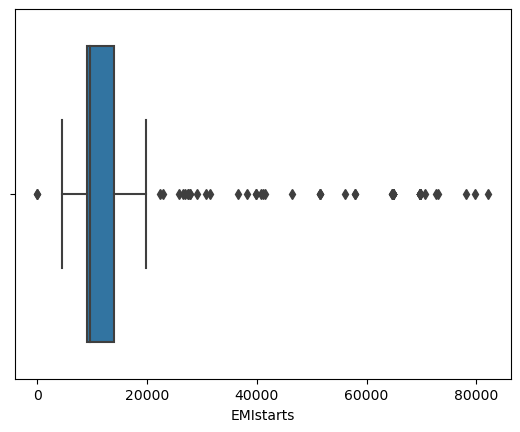

In [50]:
# box-plot for EMIstarts

sns.boxplot(data = Carwale_1, x = Carwale_1["EMIstarts"])

In [51]:
Q1 = Carwale_1["EMIstarts"].quantile(0.25)
Q3 = Carwale_1["EMIstarts"].quantile(0.75)

IQR = Q3-Q1

lower_whisker = Q1-1.5*IQR

upper_whisker = Q3+1.5*IQR

print(Q1,"-------" ,Q3,"-------", IQR, end = "\n")

print(lower_whisker,"--------", upper_whisker)


9066.75 ------- 14032.0 ------- 4965.25
1618.875 -------- 21479.875


In [52]:
Carwale_1 = Carwale_1[Carwale_1["EMIstarts"]< upper_whisker] 
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
2,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
3,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
4,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
5,Audi,Q3 2,2013,10.65,Diesel,83000,Mohali,17686
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
411,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


In [53]:
Carwale_1

,Unnamed: 0,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
1,1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
2,2,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
3,3,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
4,4,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
5,5,Audi,Q3 2,2013,10.65,Diesel,83000,Mohali,17686
...,...,...,...,...,...,...,...,...,...
409,409,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
410,410,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
411,411,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
412,412,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


In [54]:
Carwale_1.shape

(356, 9)

<AxesSubplot:xlabel='EMIstarts'>

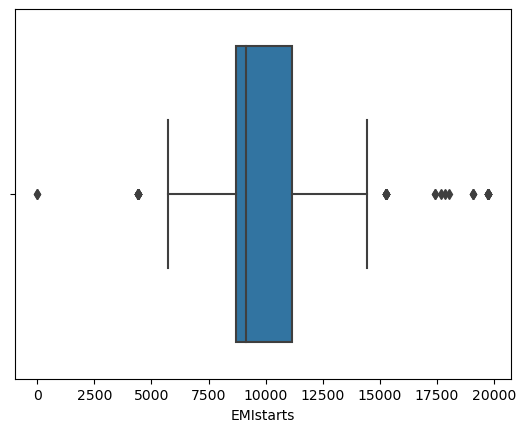

In [55]:
sns.boxplot(data=Carwale_1,x=Carwale_1["EMIstarts"])

In [56]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 1 to 413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    356 non-null    int64  
 1   Company       356 non-null    object 
 2   Model         356 non-null    object 
 3   Year          356 non-null    int64  
 4   Price in Lak  356 non-null    float64
 5   Fuel          356 non-null    object 
 6   Kilometer     356 non-null    int32  
 7   City          356 non-null    object 
 8   EMIstarts     356 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 25.0+ KB


<AxesSubplot:xlabel='Year'>

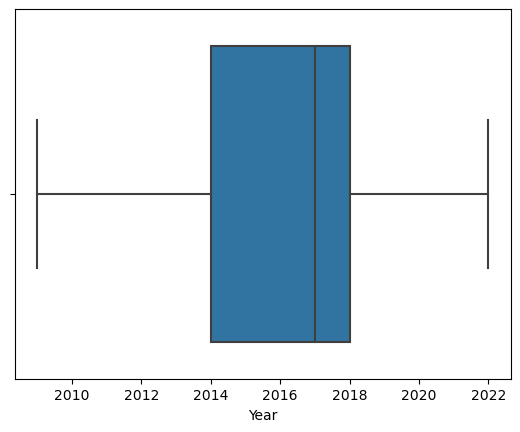

In [57]:
# box-plot for Year

sns.boxplot(data=Carwale_1,x=Carwale_1["Year"])

In [58]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
1,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
2,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
3,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
4,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
5,Audi,Q3 2,2013,10.65,Diesel,83000,Mohali,17686
...,...,...,...,...,...,...,...,...
409,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
410,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
411,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
412,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


In [59]:
Carwale_1.reset_index(drop = True, inplace = True)

In [60]:
Carwale_1.drop(["Unnamed: 0"], axis = 1)

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
1,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
2,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
3,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
4,Audi,Q3 2,2013,10.65,Diesel,83000,Mohali,17686
...,...,...,...,...,...,...,...,...
351,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
352,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
353,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
354,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


In [61]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    356 non-null    int64  
 1   Company       356 non-null    object 
 2   Model         356 non-null    object 
 3   Year          356 non-null    int64  
 4   Price in Lak  356 non-null    float64
 5   Fuel          356 non-null    object 
 6   Kilometer     356 non-null    int32  
 7   City          356 non-null    object 
 8   EMIstarts     356 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 22.4+ KB


In [62]:
Carwale_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,356.0,205.758427,120.308749,1.0,103.50,205.5,310.25,413.00
Year,356.0,2016.457865,2.478282,2009.0,2014.00,2017.0,2018.00,2022.00
Price in Lak,356.0,6.464860,2.952558,1.1,5.25,5.8,7.50,32.95
Kilometer,356.0,53531.550562,21481.718787,111.0,41468.00,55488.0,71788.00,99203.00
EMIstarts,356.0,10090.974719,3369.958275,2.0,8718.00,9133.0,11146.75,19761.00


In [63]:
Carwale_1.drop(["Unnamed: 0"],axis = 1, inplace = True)

# univariant

<AxesSubplot:xlabel='Year', ylabel='Count'>

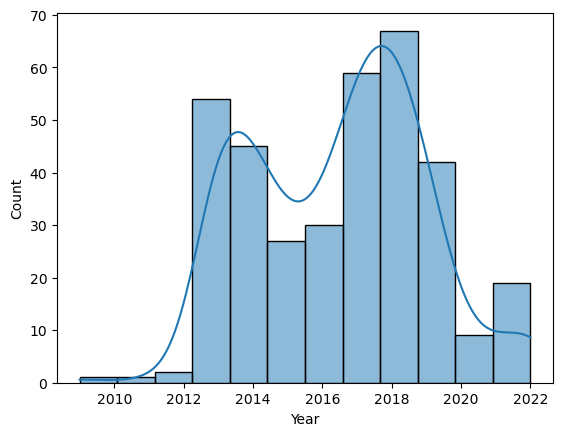

In [64]:

# Numerical data 
# Used Cars in 2017 is more when compare to other model

sns.histplot(Carwale_1["Year"], kde = True)

<AxesSubplot:xlabel='Price in Lak', ylabel='Count'>

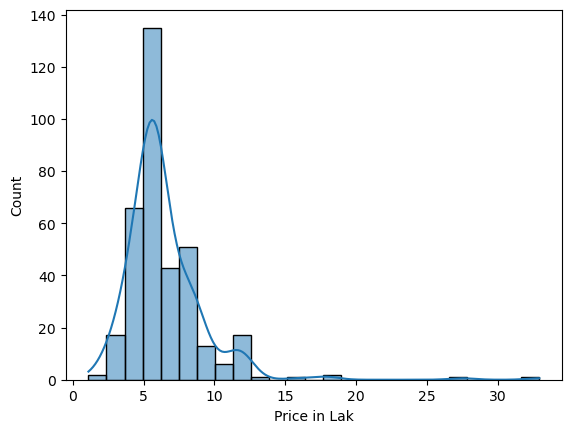

In [65]:
# Numerical data
# Continuos data 
# Count is more for 6lakhs price when compare to other prices 

sns.histplot(Carwale_1["Price in Lak"], kde = True, bins = 25)

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel', ylabel='count'>

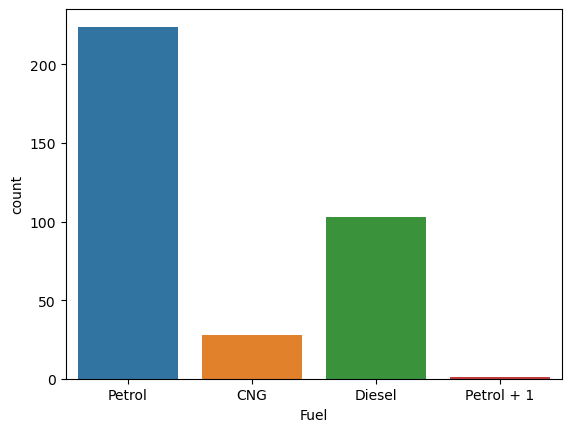

In [66]:
# Categorical data
# Petrol fuel having more count when compare to other fuel type and less count for Electric.

sns.countplot(Carwale_1["Fuel"])

([<matplotlib.patches.Wedge at 0x2925d6f3fd0>,
 [Text(-0.43436697643802213, 1.0106064168508386, 'Petrol'),
  Text(0.16440372627076175, -1.087644893698439, 'Diesel'),
  Text(1.0616763849439932, -0.28782504000217574, 'CNG'),
  Text(1.0999571702662791, -0.009706883114565367, 'Petrol + 1')],
 [Text(-0.23692744169346658, 0.551239863736821, '63%'),
  Text(0.08967475978405184, -0.5932608511082395, '29%'),
  Text(0.5790962099694508, -0.1569954763648231, '8%'),
  Text(0.5999766383270613, -0.005294663517035654, '0%')])

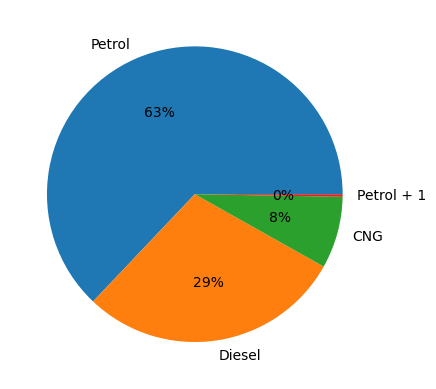

In [67]:
# Petrol fuel type Cars are used 62% when compare to other fuel type and less for Electric

plt.pie(Carwale_1["Fuel"].value_counts(), labels = Carwale_1["Fuel"].value_counts().index, autopct = "%0.0f%%")

AxesSubplot(0.125,0.11;0.775x0.77)


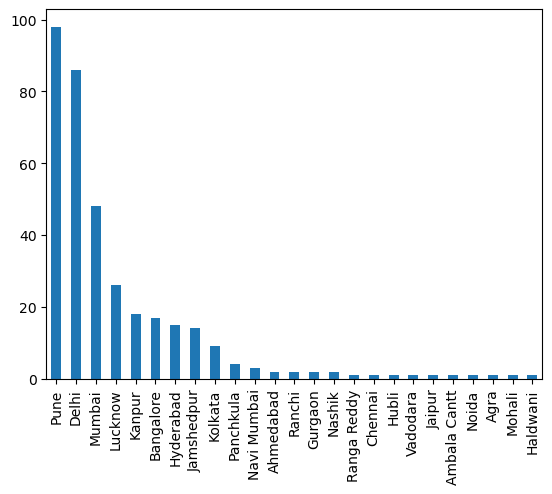

In [68]:
# Categorical data
# in Delhi used cars are higher than to other cities in india

print(Carwale_1["City"].value_counts().plot(kind = "bar"))

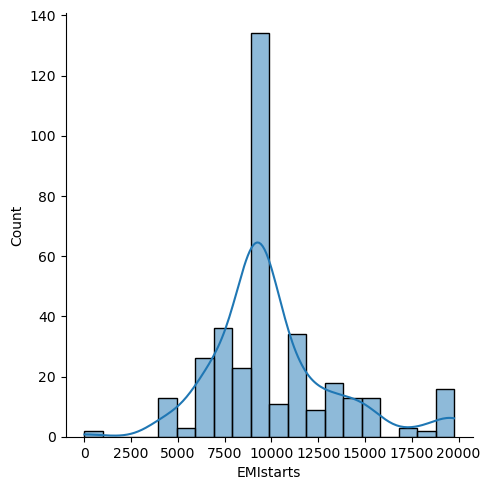

In [69]:
# Numerical data
# Continuos data 
# 8lakhs EMIstart cars have high count when compare to other EMIstarts count.

sns.displot(Carwale_1["EMIstarts"],kind="hist", bins = 20, kde = True)

<AxesSubplot:xlabel='Kilometer', ylabel='Count'>

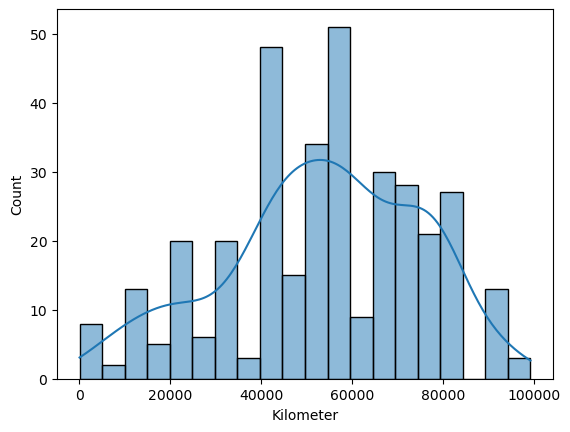

In [70]:
# Numerical data
# Continuos data
# the kilometer have high count at 56000km

sns.histplot(Carwale_1["Kilometer"], kde = True, bins = 20)

<AxesSubplot:>

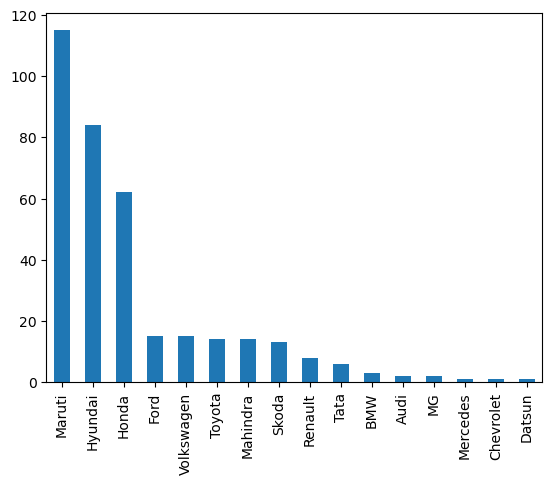

In [71]:
# Categorical data
# Maruthi having more count when compare to other company Cars

Carwale_1["Company"].value_counts().plot(kind = "bar")

<AxesSubplot:ylabel='Company'>

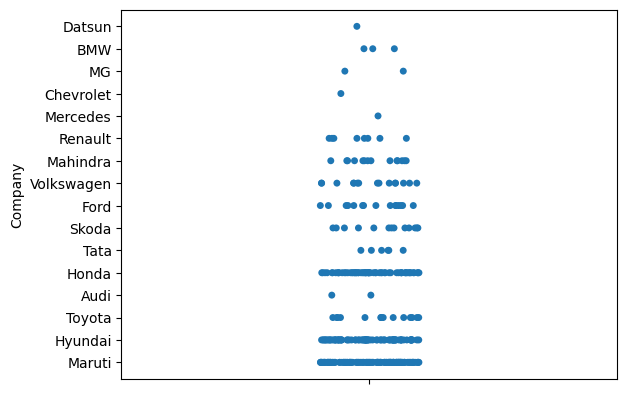

In [72]:
sns.stripplot(y = Carwale_1["Company"])

<AxesSubplot:ylabel='Model'>

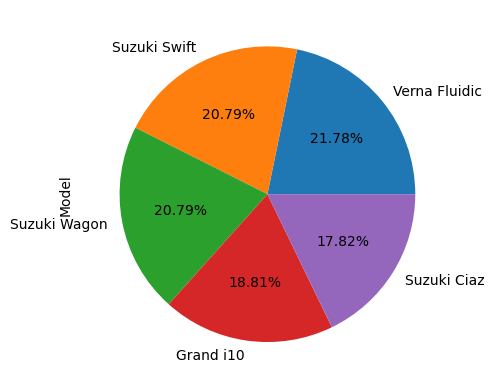

In [73]:
# Categorical data
# Suzuki Swift having more count when compare to other company model Cars

Carwale_1["Model"].value_counts()[:5].plot(kind = "pie", autopct = "%0.02f%%")

# bivariant analysis

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Kilometer'>

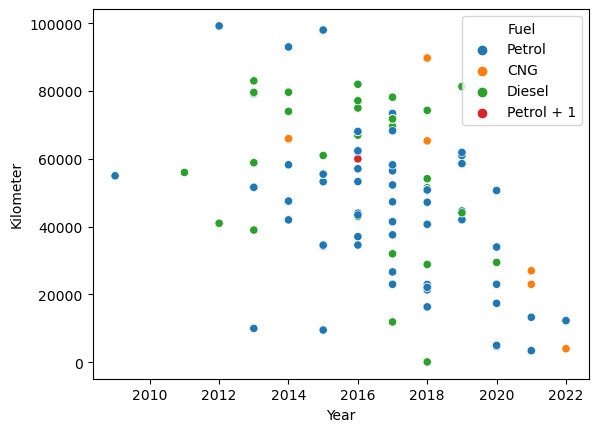

In [74]:
sns.scatterplot(Carwale_1["Year"], Carwale_1["Kilometer"], hue = Carwale_1["Fuel"])  # doubt

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022')])

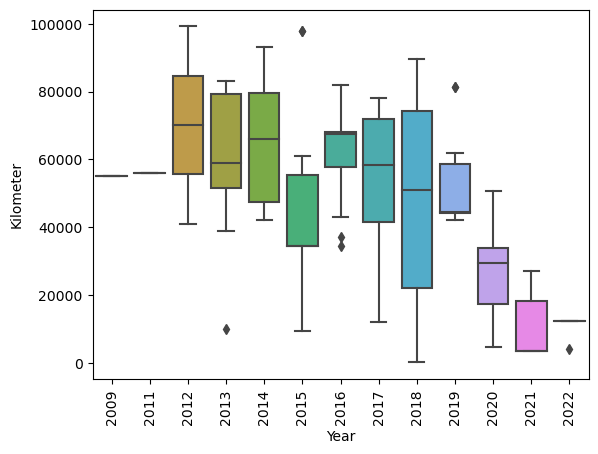

In [75]:
sns.boxplot(Carwale_1["Year"], Carwale_1["Kilometer"])  # doubt
plt.xticks(rotation = 90)

In [76]:
Carwale_1

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
1,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
2,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
3,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
4,Audi,Q3 2,2013,10.65,Diesel,83000,Mohali,17686
...,...,...,...,...,...,...,...,...
351,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
352,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
353,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
354,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMIstarts', ylabel='Kilometer'>

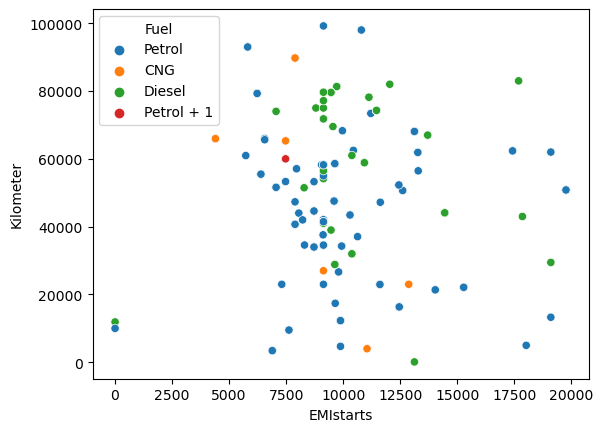

In [77]:
sns.scatterplot(Carwale_1["EMIstarts"], Carwale_1["Kilometer"], hue = Carwale_1["Fuel"])  # doubt

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Price in Lak'>

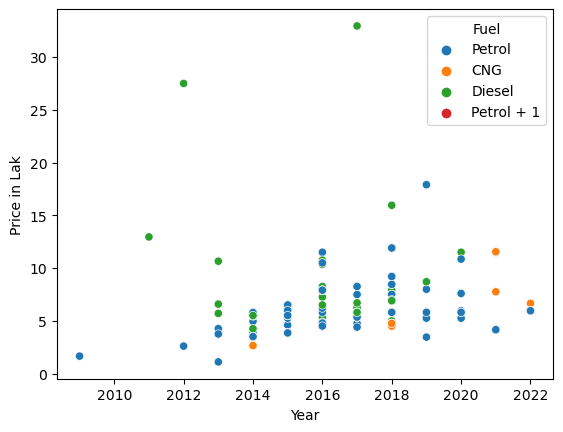

In [78]:
sns.scatterplot(Carwale_1["Year"], Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])  # doubt

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price in Lak'>

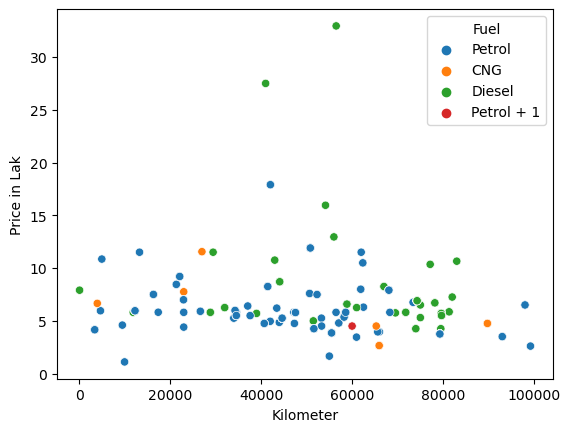

In [79]:
sns.scatterplot(Carwale_1["Kilometer"], Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])  # doubt

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer', ylabel='Price in Lak'>

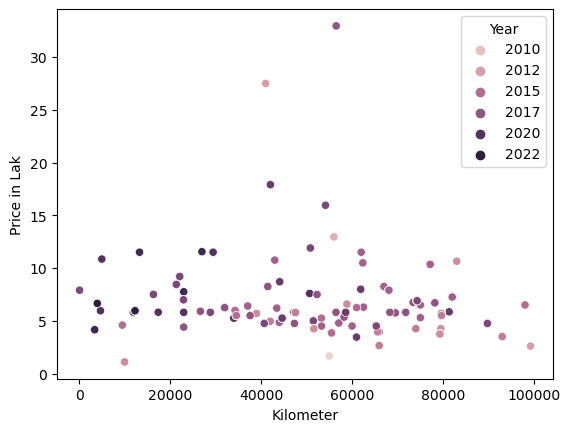

In [80]:
sns.scatterplot(Carwale_1["Kilometer"], Carwale_1["Price in Lak"], hue = Carwale_1["Year"])  # doubt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022')])

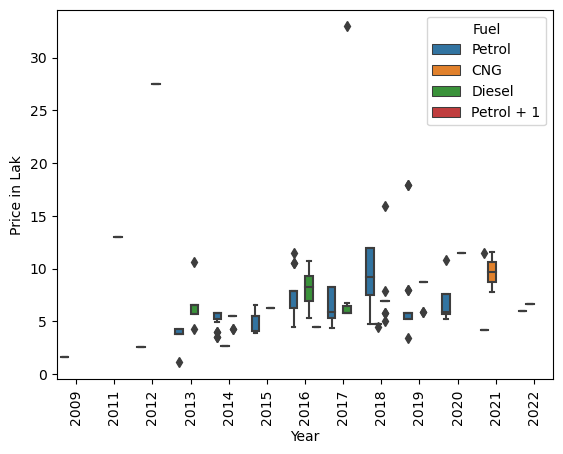

In [100]:
# Categorical Vs Continuous 


sns.boxplot(x = Carwale_1["Year"], y = Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022')])

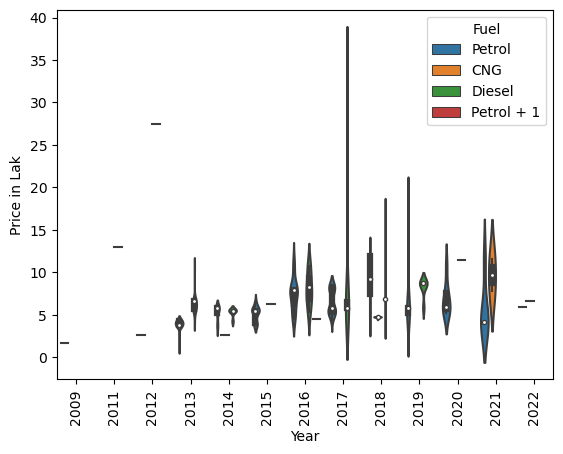

In [101]:
sns.violinplot(x = Carwale_1["Year"], y = Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])
plt.xticks(rotation = 90)

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022')])

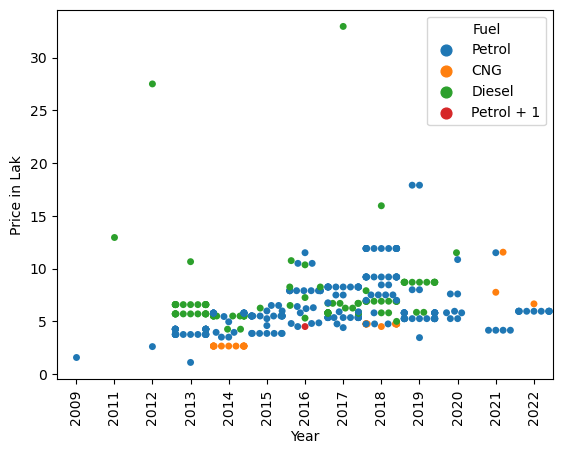

In [102]:
sns.swarmplot(x = Carwale_1["Year"], y = Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])
plt.xticks(rotation = 90)

C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kamid\OneDrive\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Mohali'),
  Text(4, 0, 'Pune'),
  Text(5, 0, 'Agra'),
  Text(6, 0, 'Hyderabad'),
  Text(7, 0, 'Kanpur'),
  Text(8, 0, 'Jamshedpur'),
  Text(9, 0, 'Lucknow'),
  Text(10, 0, 'Noida'),
  Text(11, 0, 'Ambala Cantt'),
  Text(12, 0, 'Hubli'),
  Text(13, 0, 'Navi Mumbai'),
  Text(14, 0, 'Panchkula'),
  Text(15, 0, 'Jaipur'),
  Text(16, 0, 'Vadodara'),
  Text(17, 0, 'Ahmedabad'),
  Text(18, 0, 'Nashik'),
  Text(19, 0, 'Chennai'),
  Text(20, 0, 'Gurgaon'),
  Text(21, 0, 'Ranga Reddy'),
  Text(22, 0, 'Bangalore'),
  Text(23, 0, 'Ranchi'),
  Text(24, 0, 'Haldwani')])

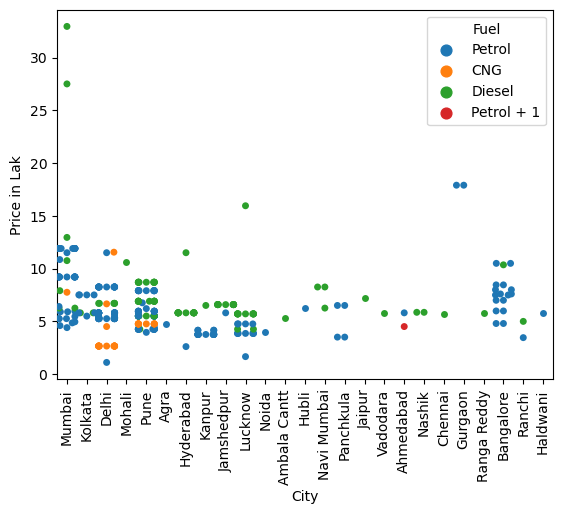

In [103]:
sns.swarmplot(x = Carwale_1["City"], y = Carwale_1["Price in Lak"], hue = Carwale_1["Fuel"])
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='EMIstarts', ylabel='Price in Lak'>

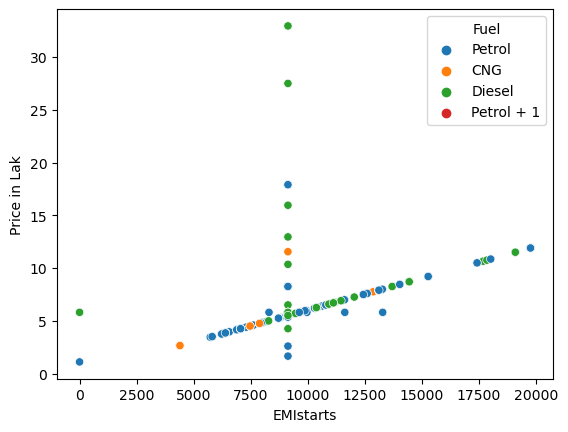

In [85]:
# Continuous Vs Continuous 

sns.scatterplot(y = Carwale_1["Price in Lak"], x = Carwale_1["EMIstarts"], hue =Carwale_1["Fuel"])

<AxesSubplot:xlabel='EMIstarts', ylabel='Price in Lak'>

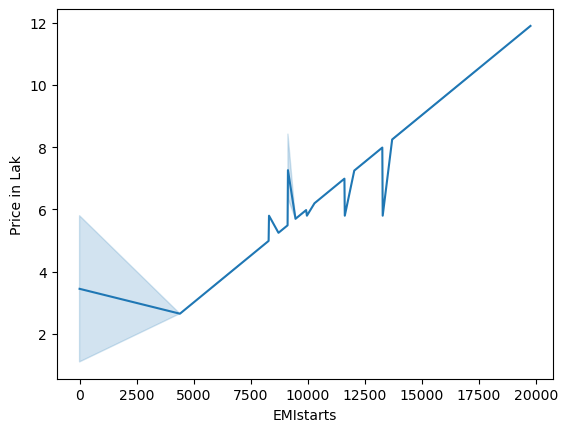

In [86]:
sns.lineplot(y = Carwale_1["Price in Lak"], x = Carwale_1["EMIstarts"])

<AxesSubplot:xlabel='Kilometer', ylabel='Price in Lak'>

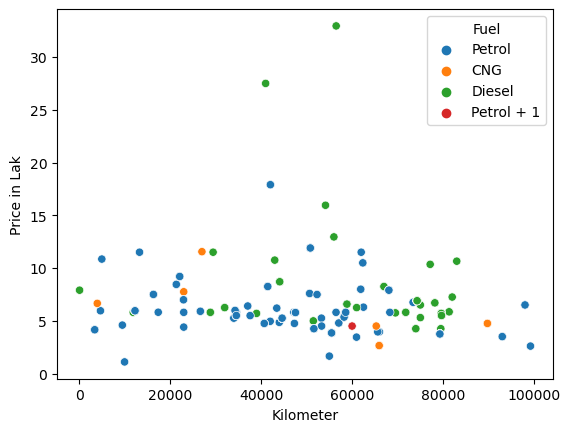

In [87]:
# Continuous Vs Continuous 

sns.scatterplot(y = Carwale_1["Price in Lak"], x = Carwale_1["Kilometer"], hue = Carwale_1["Fuel"])

<AxesSubplot:xlabel='Kilometer', ylabel='Price in Lak'>

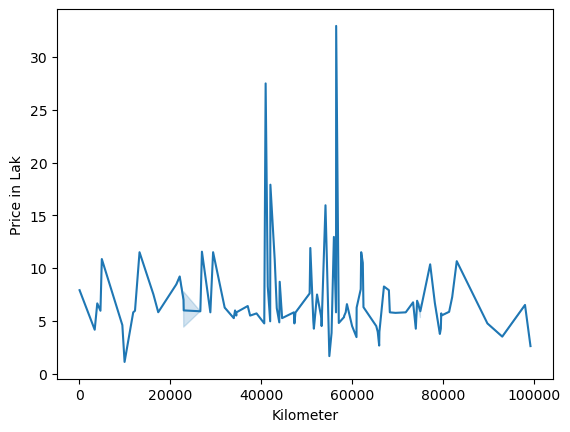

In [88]:
sns.lineplot(y = Carwale_1["Price in Lak"], x = Carwale_1["Kilometer"])

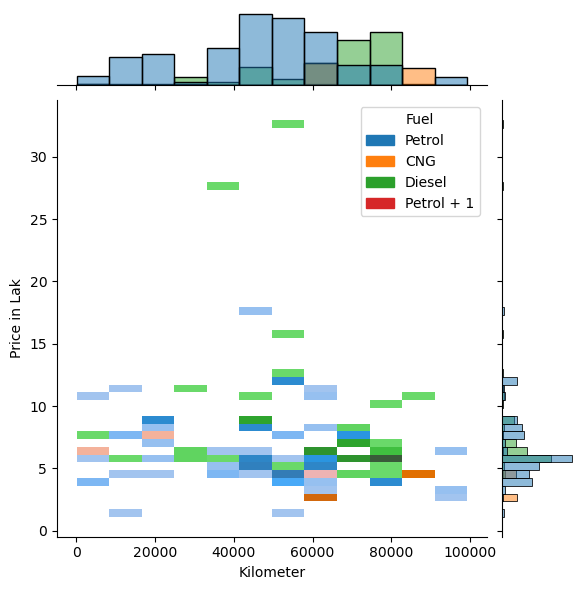

In [89]:
sns.jointplot(y = Carwale_1["Price in Lak"], x = Carwale_1["Kilometer"], hue = Carwale_1["Fuel"], kind = "hist")

In [90]:
'''sns.catplot(data = Carwale_1,
           x = "Kilometer",
           kind = "count",
           hue = "Fuel",
           row = "Price in Lak",
           col = "City")'''

'sns.catplot(data = Carwale_1,\n           x = "Kilometer",\n           kind = "count",\n           hue = "Fuel",\n           row = "Price in Lak",\n           col = "City")'

In [91]:
Carwale_1

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
1,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
2,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
3,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
4,Audi,Q3 2,2013,10.65,Diesel,83000,Mohali,17686
...,...,...,...,...,...,...,...,...
351,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
352,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
353,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
354,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022')])

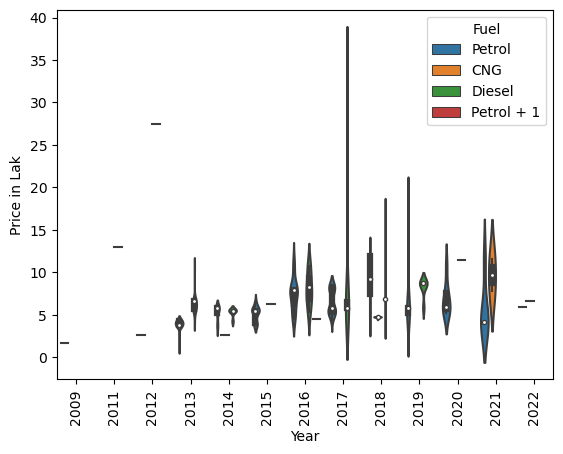

In [104]:
sns.violinplot(y = Carwale_1["Price in Lak"], x = Carwale_1["Year"], hue = Carwale_1["Fuel"])
plt.xticks(rotation = 90)

# multivariant Analysis

<AxesSubplot:>

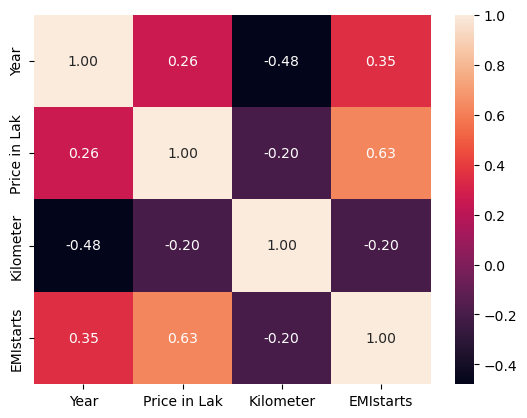

In [93]:
# Categprical Vs Categorical
# 

Carwale_1.corr()
sns.heatmap(Carwale_1.corr(),
           annot = True,
           fmt = ".2f")

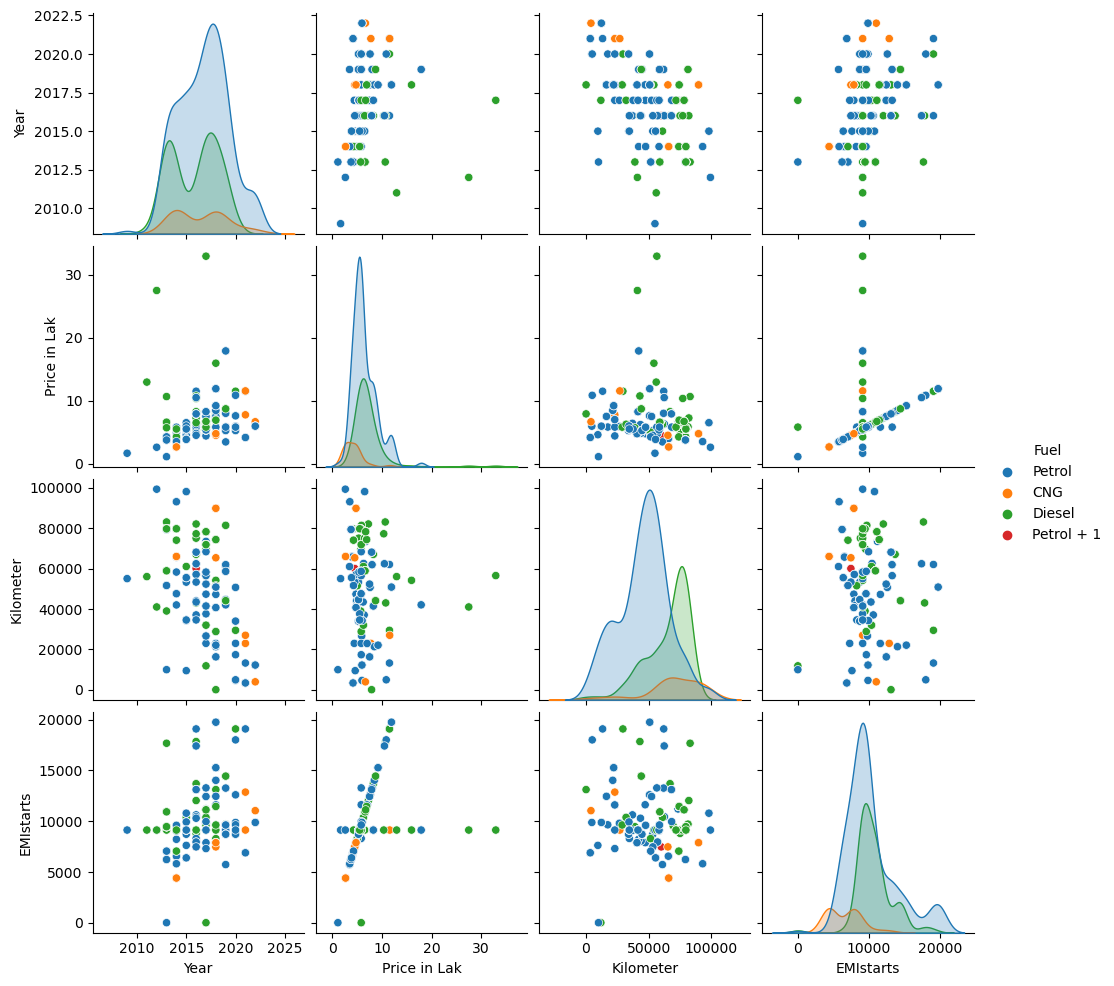

In [94]:
sns.pairplot(Carwale_1, hue = "Fuel")

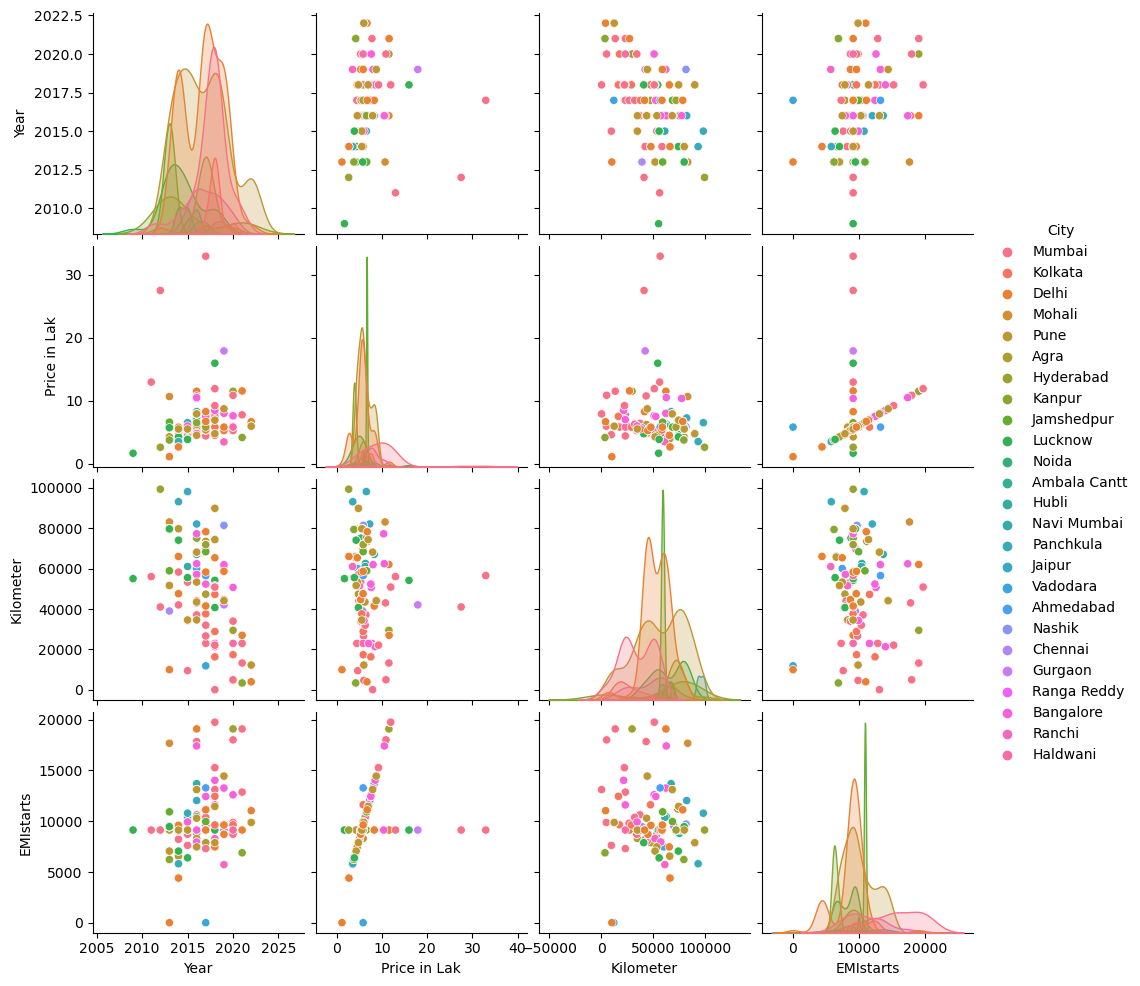

In [95]:
sns.pairplot(Carwale_1, hue = "City")

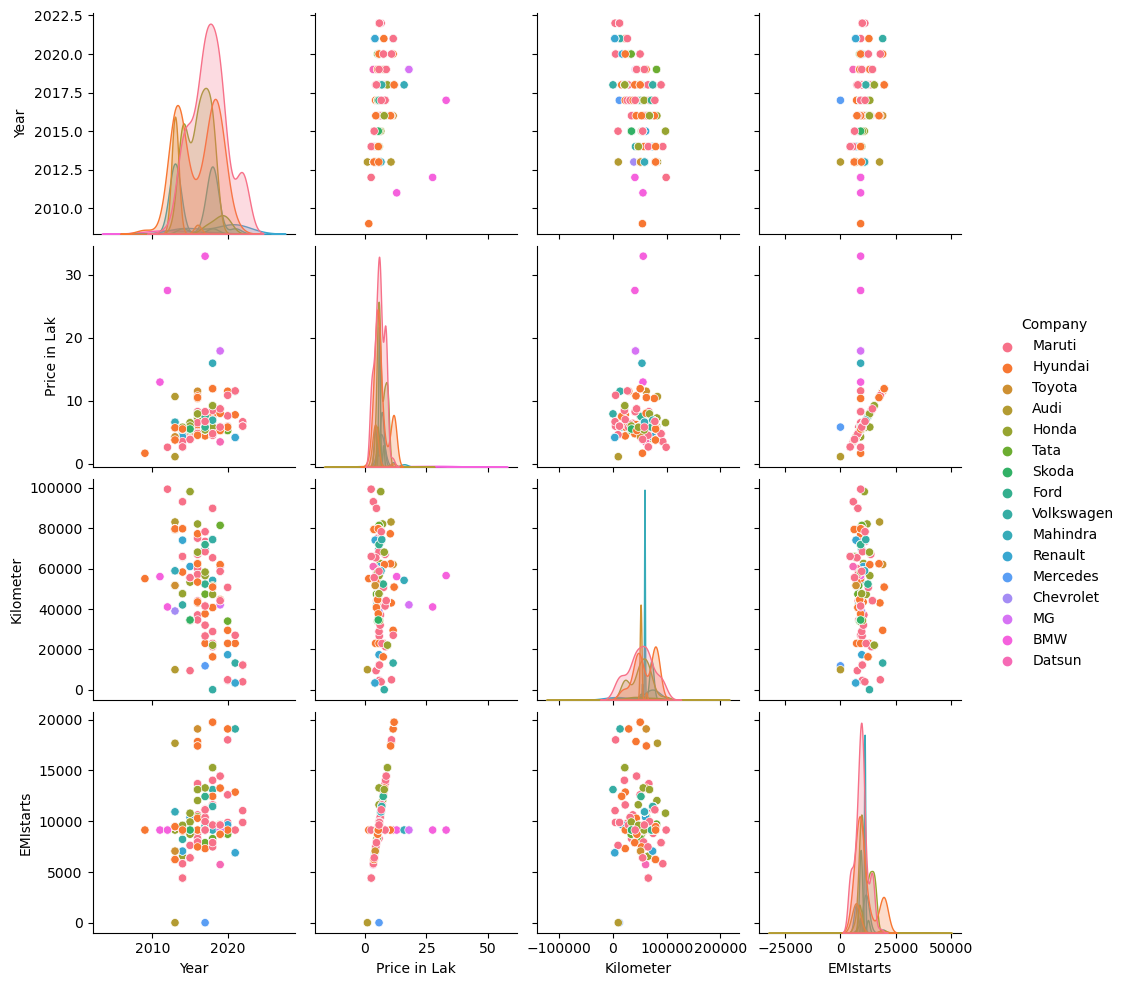

In [96]:
sns.pairplot(Carwale_1, hue = "Company")

In [97]:
Carwale_1

,Company,Model,Year,Price in Lak,Fuel,Kilometer,City,EMIstarts
0,Maruti,Suzuki Ciaz,2016,6.40,Petrol,37065,Mumbai,10628
1,Hyundai,Aura S,2021,7.75,CNG,23000,Mumbai,12870
2,Maruti,Suzuki Swift,2018,5.80,Diesel,28851,Kolkata,9631
3,Toyota,Corolla Altis,2016,11.50,Petrol,62000,Delhi,19097
4,Audi,Q3 2,2013,10.65,Diesel,83000,Mohali,17686
...,...,...,...,...,...,...,...,...
351,Hyundai,Verna Fluidic,2014,5.50,Diesel,79649,Pune,9133
352,Maruti,Suzuki Vitara,2019,8.70,Diesel,44091,Pune,14447
353,Maruti,Suzuki Swift,2019,5.80,Petrol,58595,Delhi,9631
354,Maruti,Suzuki Wagon,2015,3.85,Petrol,55488,Lucknow,6393


In [98]:
Carwale_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       356 non-null    object 
 1   Model         356 non-null    object 
 2   Year          356 non-null    int64  
 3   Price in Lak  356 non-null    float64
 4   Fuel          356 non-null    object 
 5   Kilometer     356 non-null    int32  
 6   City          356 non-null    object 
 7   EMIstarts     356 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 19.6+ KB


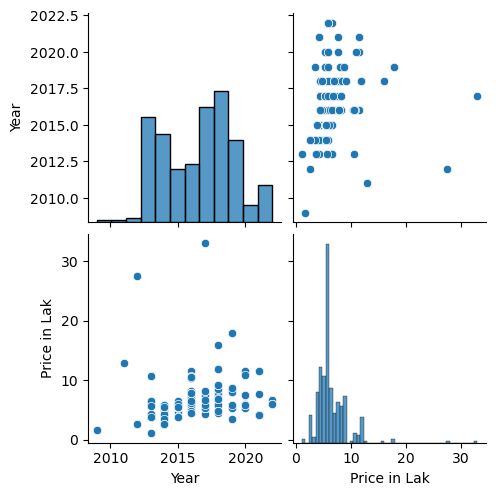

In [99]:
Carwale_2 = Carwale_1.select_dtypes(include = ["float64", "int64"])
sns.pairplot(Carwale_2)